In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [132]:
# https://www.google.com/get/sunroof/data-explorer/place/ChIJ7cmZVwkRsYkRxTxC4m0-2L8/
data = pd.read_csv('../data/google_processed.csv')

In [6]:
data.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

In [114]:
def get_capacity(json_file):
    # Each row in dataset contains json-like data structure, converts
    sizes = json.loads(json_file)
    # Assumptions for parameters
    flat_fraction = np.random.normal(.7,.1)
    pct_roof_farmed = np.random.normal(.3,.05)
    produce_rate_per_sf = np.random.uniform(.5,3)
    # Initialize lists
    kws = []
    flat_roof_size = []
    dist = []
    # Loop through each bin and the distribution of the capacity                                 
    for size in sizes:
        # Predicted rooftop solar capacity in KWs DC
        kw_install = size[0]
        # Number of roofs in this bin
        roofs = size[1]
        # Convert to watts, divide by 250 W panel, multiply by size of panel in sq ft, get fraction flat 
        sqft = kw_install * 1000 / 250 * flat_fraction * 17.6183686
        # Append to lists
        kws.append(kw_install)
        flat_roof_size.append(sqft)
        dist.append(roofs)
    # Convert to numpy for element-wise multiplication property
    flat_roof_size = np.array(flat_roof_size) 
    dist = np.array(dist)
    kws = np.array(kws)
    # Only considers roofs above 10,000 Square Feet
    size_above_10000 = flat_roof_size[flat_roof_size > 10000]
    dist_above_10000 = dist[flat_roof_size > 10000]
    kws_above_10000 = kws[flat_roof_size > 10000]
    
    return np.sum(kws_above_10000 * dist_above_10000)

In [89]:
ric = data[(data['region_name'] == 'Richmond') & (data['state_name'] == 'Virginia')]

In [107]:
capacity = get_capacity(ric['install_size_kw_buckets_json'].to_numpy()[0])
capacity / ric['kw_total'].values[0] * ric['yearly_sunlight_kwh_total']

5625    5.362682e+08
Name: yearly_sunlight_kwh_total, dtype: float64

In [104]:
df = data.sample(5)
display(df)
n = df.shape[0]
df.iloc[np.random.randint(n, size=n)]

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
3922,Middletown,Indiana,40.065148,40.050768,-85.527688,-85.555078,40.057013,-85.538928,970.70,20.0,...,9.928122e+04,1.921309e+05,5.478423e+04,8.310660e+04,7.286033e+05,38119.299219,1.157906e+06,"[[5,2],[10,1],[15,2],[20,4],[30,1],[35,2],[40,...",958.577220,0.0
2904,Kimberly,Wisconsin,44.277870,44.251062,-88.320552,-88.354801,44.267808,-88.337359,969.85,2215.0,...,1.317042e+06,1.196370e+07,8.153917e+06,9.337097e+06,2.189922e+07,10260.749786,5.267097e+07,"[[0,504],[5,624],[10,388],[15,288],[20,141],[2...",41405.576401,2.0
6490,Southchase,Florida,28.407010,28.370059,-81.373796,-81.390611,28.393039,-81.384071,1135.60,1559.0,...,2.732631e+06,1.403535e+07,1.104634e+07,1.259710e+07,2.125074e+07,25806.236572,6.166216e+07,"[[0,18],[5,116],[10,305],[15,404],[20,339],[25...",32959.691503,90.0
2514,Hopkinton,Massachusetts,42.266166,42.183623,-71.463446,-71.599818,42.222190,-71.531740,970.70,3218.0,...,5.457292e+05,1.709900e+07,8.090687e+06,8.114919e+06,3.266652e+07,8892.834888,6.651686e+07,"[[0,785],[5,1230],[10,660],[15,241],[20,91],[2...",28801.153955,58.0
183,Chandler,Texas,32.320328,32.285087,-95.465351,-95.492324,32.308457,-95.480287,1093.95,855.0,...,9.648810e+05,5.762495e+06,3.048576e+06,4.093803e+06,6.336345e+06,15647.546759,2.020610e+07,"[[0,80],[5,221],[10,257],[15,147],[20,50],[25,...",9825.951997,1.0


,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
2514,Hopkinton,Massachusetts,42.266166,42.183623,-71.463446,-71.599818,42.222190,-71.531740,970.70,3218.0,...,5.457292e+05,1.709900e+07,8.090687e+06,8.114919e+06,3.266652e+07,8892.834888,6.651686e+07,"[[0,785],[5,1230],[10,660],[15,241],[20,91],[2...",28801.153955,58.0
6490,Southchase,Florida,28.407010,28.370059,-81.373796,-81.390611,28.393039,-81.384071,1135.60,1559.0,...,2.732631e+06,1.403535e+07,1.104634e+07,1.259710e+07,2.125074e+07,25806.236572,6.166216e+07,"[[0,18],[5,116],[10,305],[15,404],[20,339],[25...",32959.691503,90.0
3922,Middletown,Indiana,40.065148,40.050768,-85.527688,-85.555078,40.057013,-85.538928,970.70,20.0,...,9.928122e+04,1.921309e+05,5.478423e+04,8.310660e+04,7.286033e+05,38119.299219,1.157906e+06,"[[5,2],[10,1],[15,2],[20,4],[30,1],[35,2],[40,...",958.577220,0.0
183,Chandler,Texas,32.320328,32.285087,-95.465351,-95.492324,32.308457,-95.480287,1093.95,855.0,...,9.648810e+05,5.762495e+06,3.048576e+06,4.093803e+06,6.336345e+06,15647.546759,2.020610e+07,"[[0,80],[5,221],[10,257],[15,147],[20,50],[25,...",9825.951997,1.0
2514,Hopkinton,Massachusetts,42.266166,42.183623,-71.463446,-71.599818,42.222190,-71.531740,970.70,3218.0,...,5.457292e+05,1.709900e+07,8.090687e+06,8.114919e+06,3.266652e+07,8892.834888,6.651686e+07,"[[0,785],[5,1230],[10,660],[15,241],[20,91],[2...",28801.153955,58.0


In [149]:
bootstraps = 1000
# Get the top 200 cities by the number of roofs viable for solar pv in numpy array
data = data.sort_values('count_qualified',ascending=False).iloc[:200,:]
n = data.shape[0]
kwhs = []
for _ in range(bootstraps):
    # Resample data
    bootstrap_cities = data.iloc[np.random.randint(n, size=n)]
    kwh = 0
    kw_total, kwh_total = bootstrap_cities['kw_total'], bootstrap_cities['yearly_sunlight_kwh_total']
    cities = bootstrap_cities['install_size_kw_buckets_json'].to_numpy()
    for idx, city in enumerate(cities):
        # Get capacity total for each city
        capacity = get_capacity(city)
        # Divide by Total Capacity of that city,  multiply by city total KWHS
        kwh = capacity  / kw_total.iloc[idx] * kwh_total.iloc[idx]
    kwhs.append(kwh)
# #         print(city)

In [163]:
k = pd.DataFrame(kwhs,columns=['Summary Statistics'])
k.describe()

,Summary Statistics
count,1.000000e+03
mean,-6.949367e+08
std,8.345507e+08
min,-7.175057e+09
25%,-7.249682e+08
50%,-4.506871e+08
75%,-2.644420e+08
max,-2.776693e+07


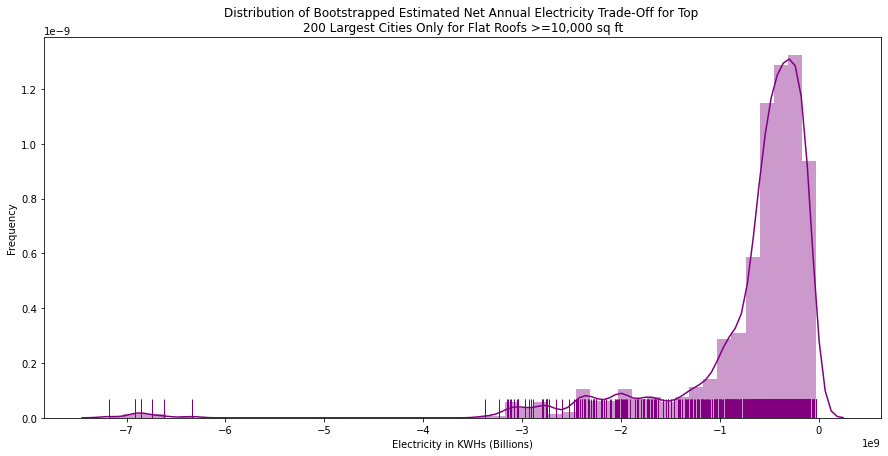

In [164]:

fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(kwhs,rug=True,ax=ax,color='Purple')
ax.set_title('Distribution of Bootstrapped Estimated Net Annual Electricity Trade-Off for Top \n200 Largest Cities Only for Flat Roofs >=10,000 sq ft')
ax.set_xlabel('Electricity in KWHs (Billions)')
ax.set_ylabel('Frequency');

In [167]:
totalkwh = data['yearly_sunlight_kwh_total'].sum()
k.describe() / totalkwh

,Summary Statistics
count,2.098439e-09
mean,-1.458282e-03
std,1.751254e-03
min,-1.505642e-02
25%,-1.521301e-03
50%,-9.457393e-04
75%,-5.549154e-04
max,-5.826721e-05


n = Number of Roofs of this size <br>
k = Capacity of the Bin
t = Total Capacity of That City <br>
e = Total Generation of That City <br>
N = Number of Cities <br>
* n}{t} * e
$$E=\sum_{i=0}^{N} \frac{\sum_{i=0}^{M} k * n}{t} * e $$